<a href="https://colab.research.google.com/github/abdallah388687/Unsupervised-ML-Algorithms/blob/main/Credit_Card_Clustering_Kernel_PCA_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card Dataset for clustering

In this notebook, I am trying Log Transformation + Kernel PCA as preprocessing for all clustering algorithms and here I have chosen number of commponents = 10 in Kernel PCA so the results of clustering was different from the approach of not selecting the compoments

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('CC GENERAL.csv')

**EDA**

In [ ]:
df1=df
df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#Drop null values and drop cust_id column
df1.dropna(inplace=True)
df1.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
#Check number of null values
df1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

*Now we'll see how each column in the dataframe is distributed.*

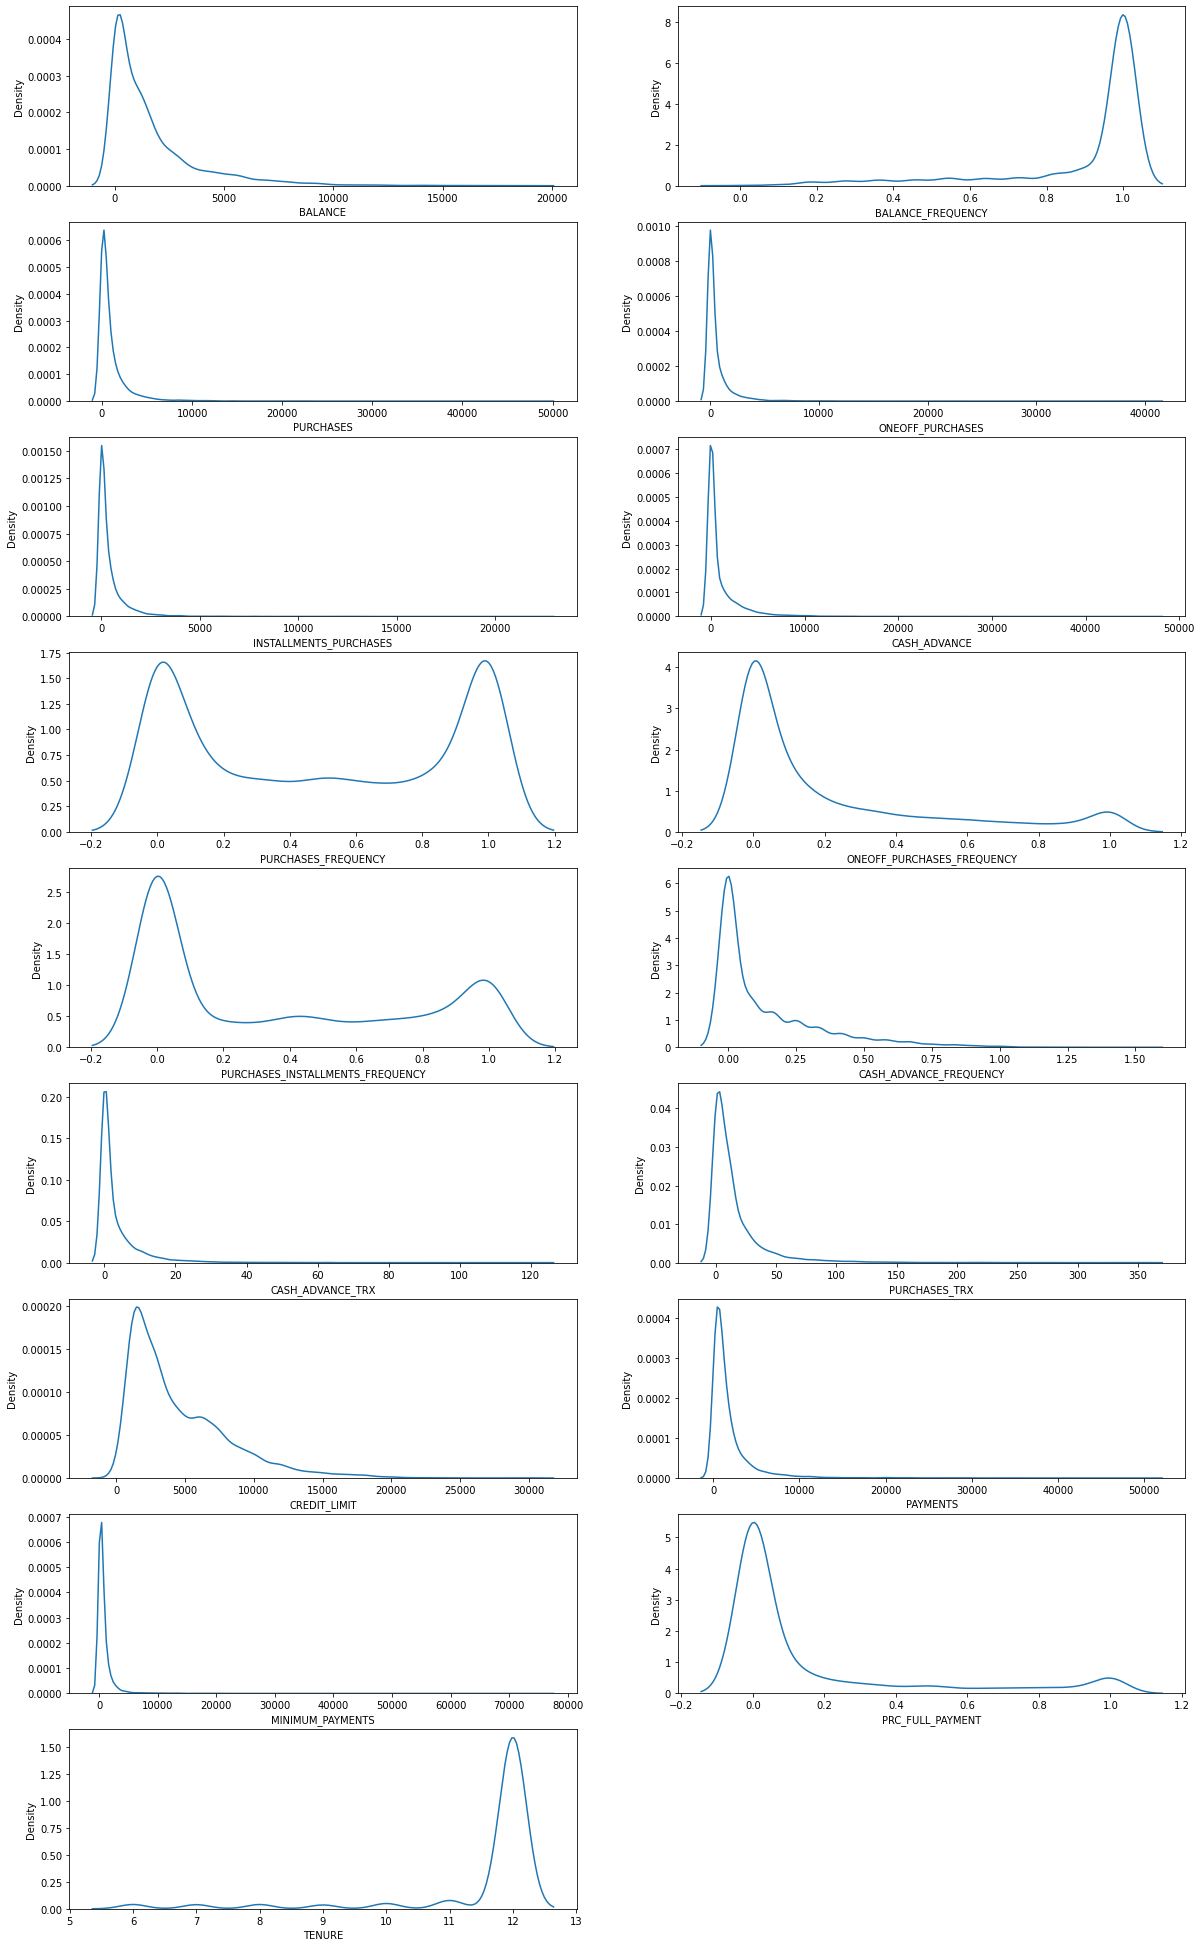

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df1.columns):
  if df1[col].dtype!='object':
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df1[col], ax=ax)
    plt.xlabel(col)

In [ ]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


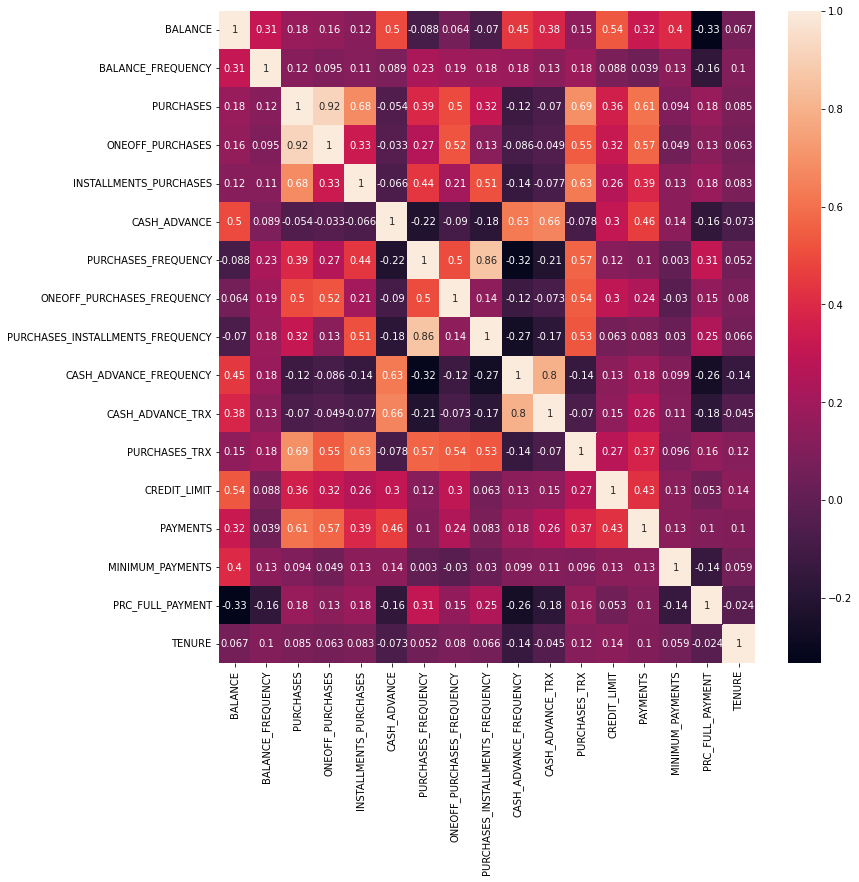

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

Log Transformation to deal with skewness in dataset

In [ ]:
for col in df1.columns:
    df1[col] = np.log(1 + df1[col])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(df1)

KERNEL PCA:

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

There are various kernel methods like linear, polynomial, and gaussian.

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
Res_kpca = kpca.fit_transform(df1)
df_PCA = pd.DataFrame(Res_kpca)
df_PCA.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-0.316655,0.518660,0.085757,0.035720,-0.015652,-0.012605,-0.353939,0.060512,0.082013,0.229201
1,0.569986,0.071253,0.111611,0.004157,-0.027734,0.586436,-0.003635,0.008141,0.000260,0.005529
2,-0.102019,-0.177922,-0.303104,0.504025,-0.085828,0.016659,0.026615,0.083910,-0.134407,0.212948
3,-0.044340,-0.042467,-0.205327,0.217165,-0.012058,-0.072369,0.016535,0.046219,0.018397,0.104189
4,-0.186224,0.187854,0.009408,-0.041324,0.023448,0.000349,0.579882,0.073158,-0.094605,0.057240
5,-0.181012,-0.397703,0.272450,-0.102479,0.057468,-0.007480,-0.114004,0.428021,-0.140803,-0.208252
6,-0.268727,0.331246,0.071467,-0.028587,0.016550,-0.001523,0.640642,0.048052,-0.113479,0.155157
7,-0.270377,-0.460093,0.328936,0.082712,-0.018538,0.004373,0.030306,-0.187372,0.035262,0.312026
8,-0.104386,-0.175720,-0.327202,0.577536,-0.136997,0.021489,-0.010554,0.035044,-0.078752,-0.162214
9,-0.215729,0.240570,0.031458,-0.039280,0.021769,0.000437,0.616565,0.066846,-0.106888,0.081107


Use TSNE Algorithm for embedding (Moving from 4-dim space to 2-dim space)

In [ ]:
from sklearn.manifold import TSNE

tsne_projection = TSNE(n_components=2, 
                       perplexity=50,
                       n_iter=10**4,
                       early_exaggeration = 12, 
                       init='random',
                       random_state=42).fit_transform(df_PCA)
tsne_projection = pd.DataFrame(tsne_projection)
tsne_projection

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1
0,-59.407619,66.873520
1,10.531981,-74.045578
2,-25.901361,21.385733
3,-22.532774,1.789568
4,2.054819,82.750305
...,...,...
8631,-8.750680,-22.030550
8632,-57.889759,85.123375
8633,-62.760918,64.959213
8634,-43.100754,-27.655609


## **KMeansClustering Algorithm**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster_model.fit(df_PCA).labels_
    
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

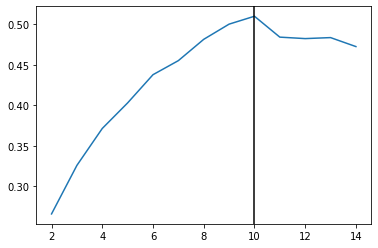

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

## **AgglomerativeClustering**

Choose number of clusters that give the best silhouette_score

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = cluster_model.fit_predict(df_PCA)
    
    silhouette_avg = silhouette_score(df_PCA, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

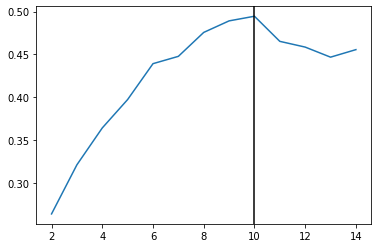

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [ ]:
cluster_labels = ["cluster" + str(label) 
                 for label in best_cluster_model.labels_]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1.2, min_samples = 5).fit(df_PCA)
labels = db_default.labels_

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **Expectation-Maximization (EM) Algorithm**

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df_PCA)
xs = pd.DataFrame(scaled_data, columns = df_PCA.columns)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np
range_n_cluster = list(range(2,15))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = GaussianMixture(n_components = n_clusters)
    cluster_labels = cluster_model.fit_predict(xs)
    
    silhouette_avg = silhouette_score(xs, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model
        labels = cluster_labels 

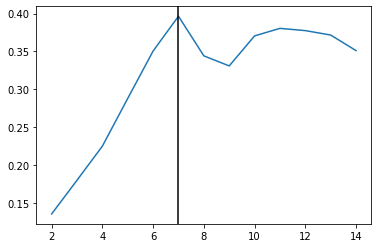

In [ ]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_components, color='black')

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

# **Isolated Random Forest**

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100, contamination=0.1, max_features=0.7)
labels = model.fit_predict(df_PCA)

In [ ]:
cluster_labels = ["cluster (" + str(label) + ")" 
                 for label in labels]

In [ ]:
import plotly.express as px
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()